# Bias Variance Dilemma

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('text', usetex=True)
import math
from scipy.stats import norm
%matplotlib inline

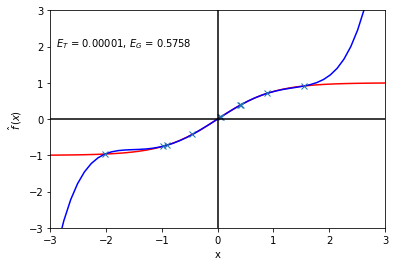

Training Error: 7.074698228235266e-06
Test Error: 0.5758379671310223


In [19]:
def genData(m,f):
    x = np.random.randn(m)
    y = np.vectorize(f)(x)
    return x, y

def fitfunc(x,y,p):
    pf = np.polyfit(x,y,p)
    return np.poly1d(pf)

def fit(m, p, f, show):
    x, y = genData(m, f) # trainig data
    fhat = fitfunc(x, y, p) # model function

    xs = np.linspace(3,-3) # test data
    ys = np.vectorize(f)(xs) # test data
    yps = fhat(xs) # prediciton for test
    
    trainingError = sum((fhat(x)-y)**2)
    px = norm.pdf(xs)
    genError = np.dot(px,(yps-ys)**2)
    if show:
        plt.plot(xs,ys,"-r",xs,yps,"-b",x,y,"x")
        plt.plot([0,0],[-4,4], "-k", [-3,3],[0,0],"-k")
        plt.axis([-3,3,-3,3])
        text = "$E_T$ = {:.5f}, $E_G$ = {:.4f}".format(float(trainingError), float(genError))

        plt.text(-2.9,2,text)
        plt.xlabel("x")
        plt.ylabel("$\hat{f}\,(x)$")
        plt.show()
 
    return trainingError, genError

tE, gE = fit(10, 5, math.tanh, True)
print('Training Error:', tE)
print('Test Error:', gE)


mean machine

$$
\hat f_m(x) = E_D[\hat f(x|D)]
$$

bias

$$
Bias(x) = (\hat f_m(x) - f(x))^2
$$



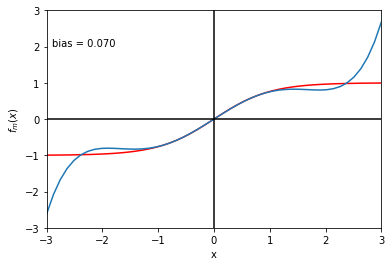

In [29]:
def findMeanMachine(m, p, f, n=100):
    meanpf = 0

    for i in range(n):
        x, y = genData(m, f) # different training data set D
        meanpf += np.polyfit(x,y,p) # fit the model

    meanpf /= n
    return np.poly1d(meanpf) # average the results of machines

meanMachine = findMeanMachine(11,5,math.tanh)

def showPoly(pf, f):
    xs = np.linspace(3,-3)
    ys = np.vectorize(f)(xs) # true data 

    yps = pf(xs) # mean machine
    px = norm.pdf(xs)
    
    bias = np.dot(px,(yps-ys)**2)
    
    plt.plot(xs,ys,"-r",xs,yps)
    plt.plot([0,0],[-4,4], "-k", [-3,3],[0,0],"-k")
    plt.axis([-3,3,-3,3])

    text = "bias = {:.3f}".format(float(bias))
    plt.text(-2.9,2,text)
    plt.xlabel("x")
    plt.ylabel("$f_m(x)$")
    plt.show()
    return bias
 
bias = showPoly(meanMachine, math.tanh)



In [32]:
def findVariance(m, p, f, n=1000):
    meanMachine = findMeanMachine(m,p,f,n)

    xs = np.linspace(3,-3) # test data
    ys = np.vectorize(f)(xs)

    ymm = meanMachine(xs) # average prediction for test data
    
    px = norm.pdf(xs)
    bias = np.dot(px,(ymm-ys)**2) # bias

    genError = 0
    trainError = 0
    variance = 0
    for i in range(n):
        x, y = genData(m, f)
        fhat = fitfunc(x,y,p)
        yps = fhat(xs) # for each different dataset, 

        trainError += sum((fhat(x)-np.vectorize(f)(x))**2)
        genError += np.dot(px,(yps-ys)**2)
        variance += np.dot(px,(yps-ymm)**2)
    genError /= n
    variance /= n
    trainError /= n
  
    return bias, variance, genError, trainError

b,v,g,_ = findVariance(11, 5, math.tanh)
print("Bias = {:.3f} Variance = {:.3f} B+V = {:.3f} E_g = {:.3f}".format(b,v,b+v,g))

Bias = 0.133 Variance = 2.116 B+V = 2.249 E_g = 2.238


In [24]:
bias = []
variance = []

genError = []
trainError = []

pp = range(1,10) # model complexity
for p in pp:
    b,v,g,t = findVariance(11, p, math.tanh)
    bias.append(b)
    variance.append(v)
    genError.append(g)
    trainError.append(t)


Why do odd polynomials fit better than even polynomials?

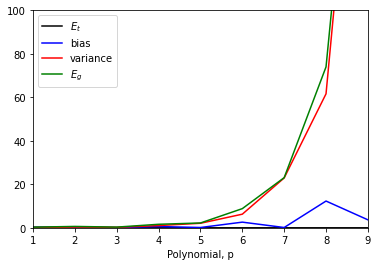

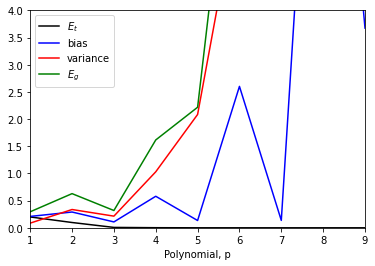

In [26]:
# Because the Taylor expansion of tanh(x) is the form of odd polynomials.
# https://math.stackexchange.com/questions/1052884/taylor-series-expansion-of-tanh-x

pp = [p for p in pp]
plt.plot(pp, trainError, "-k", label="$E_t$")
plt.plot(pp, bias, "-b", label="bias")
plt.plot(pp, variance, "-r", label="variance")
plt.plot(pp, genError, "-g", label="$E_g$")
plt.xlabel("Polynomial, p")
plt.axis([1,9,0,100])
plt.legend()
plt.show()

plt.plot(pp, trainError, "-k", label="$E_t$")
plt.plot(pp, bias, "-b", label="bias")
plt.plot(pp, variance, "-r", label="variance")
plt.plot(pp, genError, "-g", label="$E_g$")
plt.xlabel("Polynomial, p")
plt.legend()
plt.axis([1,9,0,4])
plt.show()